### Student Information
Name: 陳逸軒

Student ID: 111033648

GitHub ID: a42837tw

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Part1: Take Home Exercise
Copy cells from Master.ipynb

In [2]:
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> Exercise 1 (5 min):
In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [4]:
# Answer here
for t in  twenty_train.data[:3]:
    print("\n".join(t.split("\n")))
    print("#"*50 + "\n")

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

##################################################

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background 

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [5]:
#Answer here
X.iat[2, 0]
# Access a single value for a row/column pair by integer position.

"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63  (Well, I'll email also, but this may apply to other people, so I'll post also.)  >I've been working at this company for eight years in various >engineering jobs.  I'm female.  Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company.  >I dreaded coming back to work today.  What if my boss comes in to ask >me some kind of question...  Your boss should be the person bring these problems to.  If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it.  If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving yo

### >>> Exercise 3 (5 min):
Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X[X['category_name'] == 'sci.med'].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
Hint: axis parameter. Check the documentation for more information.

In [7]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
Hint: why .isnull() didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### 
A: np.nan: 特殊浮點數數值(dtype=float64)，在 isnull() 會判斷為 True  
B: actually donesn't exist  
C: 'NaN' represents a string  
D: same as C  
E: None ，在 isnull() 會為 True  
F: '' represents a empty string  

### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
X_sample = X.sample(n=1000) #random state

# Answer here
X.category_name.value_counts()
#X.groupby("category").count()
#size()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

In [11]:
X_sample.category_name.value_counts()

sci.med                   271
soc.religion.christian    270
comp.graphics             262
alt.atheism               197
Name: category_name, dtype: int64

The amount of data in X dataframe doesn't change.  
But the distrubution of X and X_sample are different.

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

<AxesSubplot: title={'center': 'Category distribution'}>

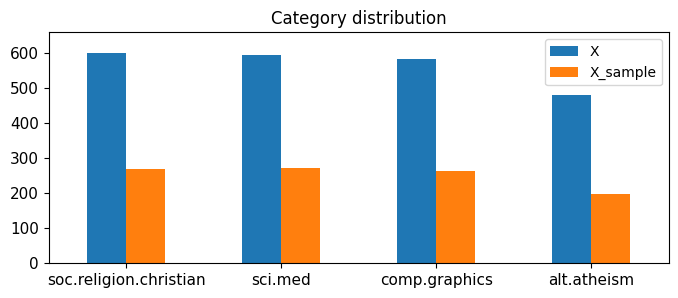

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

y_lim = max(X.category_name.value_counts()) * 1.1
X_all = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
X_all.columns = ['X', 'X_sample']
X_all.plot(kind="bar", title='Category distribution', ylim=[0, y_lim], rot=0, fontsize=11, figsize = (8,3))
# plt.show


### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()


In [15]:
# Anser here
Matrix_5 = X_counts[4, :50].toarray()
equ_1 = np.where(Matrix_5==1)
print(equ_1)
count_vect.get_feature_names_out()[equ_1[1][1]]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


'01'

Another 1 in the same record is at the index "37", which represents '01'.

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [16]:
import seaborn as sns
# plt.subplots(figsize=(9, 7))

sample_exceed_5 = np.argwhere(X_counts[:2257, 500:530] > 5) # find the index for which has frequency > 5 (for tokens between 500th and 530th in each text)
print(sample_exceed_5)


[[1403    9]
 [1890    3]
 [1890   10]
 [1890   29]
 [2225    9]]


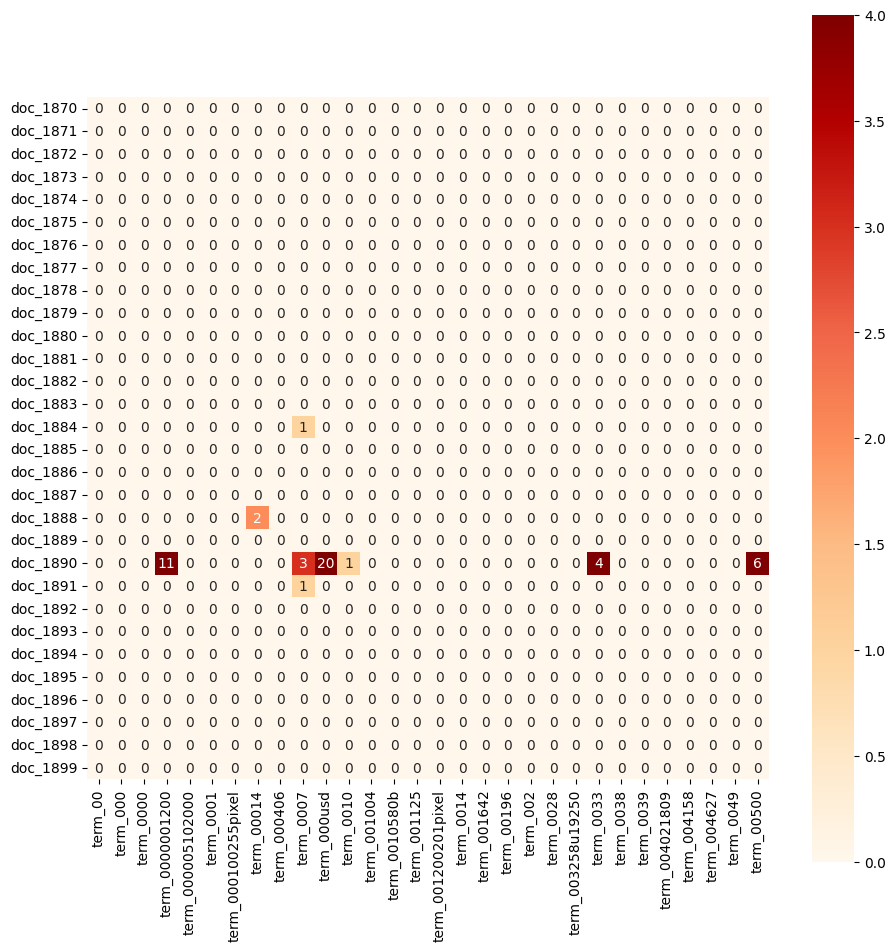

In [17]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:30]] # set the interval between the most significant result above
plot_y = ["doc_"+ str(i) for i in list(X.index)[1870:1900]] # set the interval between the most significant result above
plot_z = X_counts[1870:1900, 500:530].toarray()
plt.subplots(figsize=(11, 11))
ax = sns.heatmap(pd.DataFrame(plot_z, columns = plot_x, index = plot_y),
                 cmap="OrRd",
                 vmin=0, vmax=4, annot=True, square=True)

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

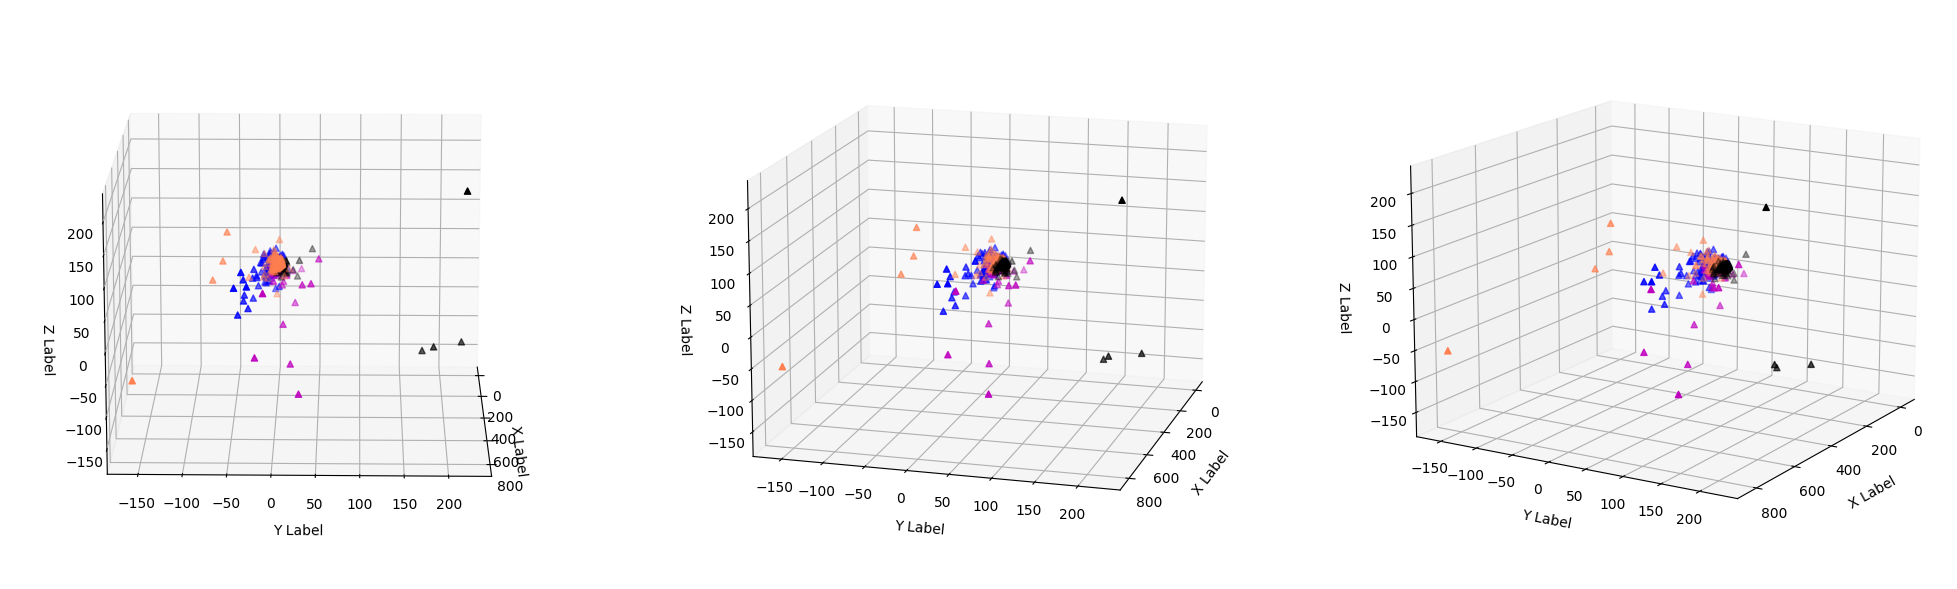

In [19]:
from matplotlib import projections


col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = []

for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
   
        ax[i].scatter(xs, ys, zs, c = c, marker='^')

    ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax[i].set_xlabel('\nX Label')
    ax[i].set_ylabel('\nY Label')
    ax[i].set_zlabel('\nZ Label')
    ax[i].view_init(elev=15, azim=(15*i+1))

plt.show()

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.


In [20]:
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

KeyboardInterrupt: 

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

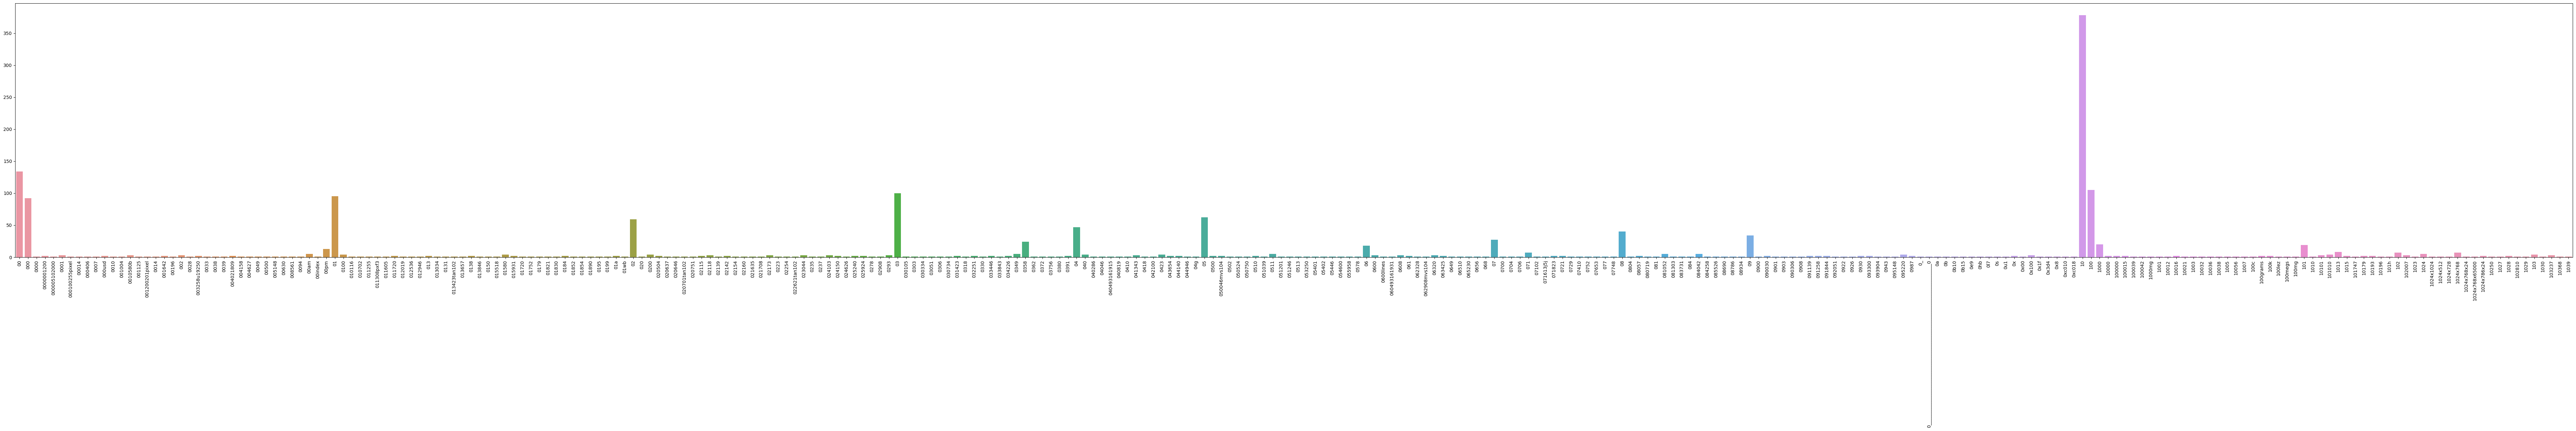

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
import plotly.express as px

count_vect = CountVectorizer(max_features=100)   # select the 100 most common words in the data
X_counts = count_vect.fit_transform(X.text)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = px.bar(term_frequencies[0:100], x=count_vect.get_feature_names_out()[0:100] ,  
             y=term_frequencies[0:100], text_auto='.2s')
fig.show()

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [ ]:
# Answer here
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:, j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis = 0))[0]
sort_index = np.argsort(-term_frequencies)
sorted_freq = term_frequencies[sort_index]
fig = px.bar(sorted_freq[0:300], x=count_vect.get_feature_names_out()[sort_index[0:300]] ,  
             y=sorted_freq[0:300])
fig.show()

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


Yes it does, they are only different in types. (Both can represent values)

### Part 2: Follow the same process from the DM2022-Lab1-Master on the new dataset.

#### 1. Download data

#### 2. Data Preparation

In [21]:
# setup categories
categories = ['amazon', 'imdb', 'yelp']

# name column
columns = ['sentence', 'score']

# load data
amazon = pd.read_table("sentiment labelled sentences/amazon_cells_labelled.txt", header=None, names=columns)
imdb = pd.read_table("sentiment labelled sentences/imdb_labelled.txt", header=None, names=columns)
yelp = pd.read_table("sentiment labelled sentences/yelp_labelled.txt", header=None, names=columns)

# add column for each website
amazon['websites'] = 'amazon'
imdb['websites'] = 'imdb'
yelp['websites'] = 'yelp'

# concat 3 files
online_comment = pd.concat([amazon,imdb,yelp], ignore_index=True)

In [22]:
print(len(online_comment))
online_comment.score[100:200]


2748


100    1
101    0
102    1
103    1
104    0
      ..
195    1
196    1
197    0
198    0
199    0
Name: score, Length: 100, dtype: int64

### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas Dataframe (Done already)

#### 3.2 Familiarizing yourself with the Data

In [23]:
# a simple query
online_comment[:10][["sentence", "score"]]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [24]:
# using loc (by label)
online_comment.loc[:10, "sentence"]

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [25]:
# using iloc (by position)
online_comment.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [26]:
# other query method 
online_comment[online_comment["score"] == 1].iloc[::10][:5] # every 10 records which value of "score" is 1, only show the first 5 records. 

,sentence,score,websites
1,"Good case, Excellent value.",1,amazon
21,I bought this to use with my Kindle Fire and a...,1,amazon
44,Excellent bluetooth headset.,1,amazon
61,I really recommend this faceplates since it lo...,1,amazon
78,"I love this phone , It is very handy and has a...",1,amazon


### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [27]:
# check missing values
online_comment.isnull()


,sentence,score,websites
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [28]:
online_comment.isnull().apply(lambda x: dmh.check_missing_values(x)) # func from dmh

,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [29]:
online_comment.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1) #  calculate the missing values in every record

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [30]:
dummy_series = pd.Series(["dummy_record", 0], index=["sentence", "score"])

In [31]:
dummy_series

sentence    dummy_record
score                  0
dtype: object

In [32]:
dummy_series = dummy_series.to_frame().T

In [33]:
result_with_series = pd.concat([online_comment, dummy_series], ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

2749


,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [34]:
result_with_series.dropna(inplace=True) # drop the data with missing value
len(online_comment)

2748

In [35]:
# dummy record as dictionary format
dummy_dict = [{"sentence": "dummy_record",
               "score": 0
              }]

result_with_series = pd.concat([online_comment, pd.DataFrame(dummy_dict)], ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

2749


,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [36]:
result_with_series.dropna(inplace=True) # drop the data with missing value
len(result_with_series)

2748

#### 4.2 Dealing with Duplicate Data

In [37]:
online_comment.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [38]:
sum(online_comment.duplicated())

17

In [39]:
duplicated_data = online_comment[online_comment.duplicated()]
print(duplicated_data)

                                               sentence  score websites
285                                       Great phone!.      1   amazon
407                                        Works great.      1   amazon
524                                       Works great!.      1   amazon
543                             Don't buy this product.      0   amazon
744   If you like a loud buzzing to override all you...      0   amazon
748                                       Does not fit.      0   amazon
778                               This is a great deal.      1   amazon
792                                        Great Phone.      1   amazon
892                    Excellent product for the price.      1   amazon
896                                        Great phone.      1   amazon
1165                   Definitely worth checking out.        1     imdb
1387                                 Not recommended.        0     imdb
1590                                            10/10        1  

In [40]:
online_comment.drop_duplicates(keep='first', inplace=True)

print(len(online_comment))

2731


### 5 Data Preprocessing

#### 5.1 Sampling

In [41]:
comment_sample = online_comment.sample(n=1000) #random state
print(len(comment_sample))
comment_sample[0:4]

1000


,sentence,score,websites
1875,"Phenomenal food, service and ambiance.",1,yelp
314,The battery is unreliable as well as the servi...,0,amazon
2586,Food is way overpriced and portions are fuckin...,0,yelp
1550,I'm a big fan of this series mostly due to Ann...,1,imdb


In [42]:
print(online_comment.groupby("websites").count())
print("-"*25)
print(comment_sample.groupby("websites").count())

          sentence  score
websites                 
amazon         990    990
imdb           745    745
yelp           996    996
-------------------------
          sentence  score
websites                 
amazon         377    377
imdb           261    261
yelp           362    362


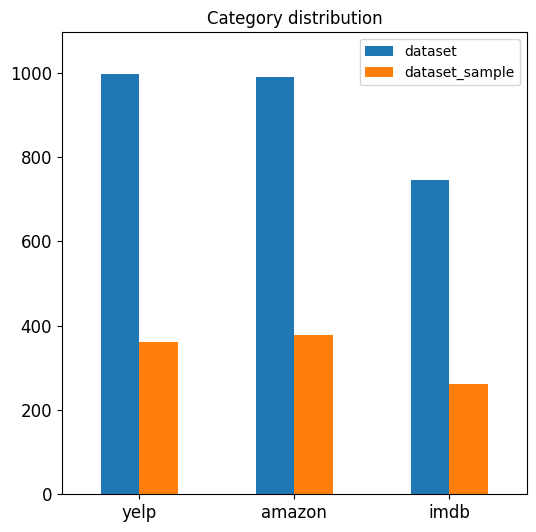

In [43]:
# plot distrubution
merged_distrubtion = pd.concat([online_comment.websites.value_counts(), comment_sample.websites.value_counts()], axis=1)
merged_distrubtion = merged_distrubtion.set_axis(['dataset', 'dataset_sample'], axis='columns', copy=False)
merged_distrubtion.plot(kind = 'bar',
                        title = 'Category distribution',
                        ylim = [0, max(online_comment.websites.value_counts())*1.1], 
                        rot = 0, fontsize = 12, figsize = (6,6))
plt.show()

#### 5.2 Feature Creation

In [44]:
import nltk
# create unigrams for each text
online_comment['unigrams'] = online_comment['sentence'].apply(lambda x: dmh.tokenize_text(x))
online_comment[0:10]

,sentence,score,websites,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


In [45]:
list(online_comment[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 5.3 Feature subset selection

In [46]:
count_vect = CountVectorizer()
comment_counts = count_vect.fit_transform(online_comment.sentence) # get document-term matrix
print(comment_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [47]:
comment_counts.shape

(2731, 5155)

In [48]:
comment_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [49]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [50]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

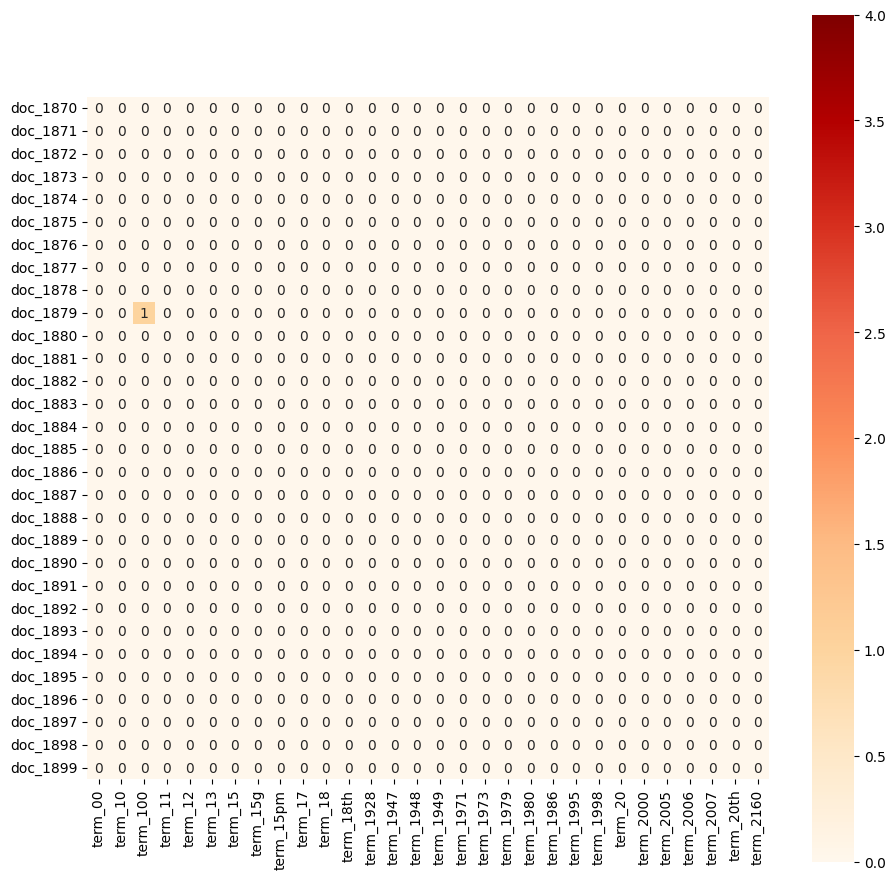

In [51]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:30]] # set the interval between the most significant result above
plot_y = ["doc_"+ str(i) for i in list(X.index)[1870:1900]] # set the interval between the most significant result above
plot_z = comment_counts[1870:1900, 500:530].toarray()
plt.subplots(figsize=(11, 11))
ax = sns.heatmap(pd.DataFrame(plot_z, columns = plot_x, index = plot_y),
                 cmap="OrRd",
                 vmin=0, vmax=4, annot=True, square=True)

#### 5.4 Dimensionality Reduction

In [52]:
count_vect = CountVectorizer()
comment_counts = count_vect.fit_transform(online_comment.sentence)
# PCA 
# plot 2D
comment_reduced = PCA(n_components=2).fit_transform(comment_counts.toarray()) 
comment_reduced.shape

(2731, 2)

In [53]:
categories

['amazon', 'imdb', 'yelp']

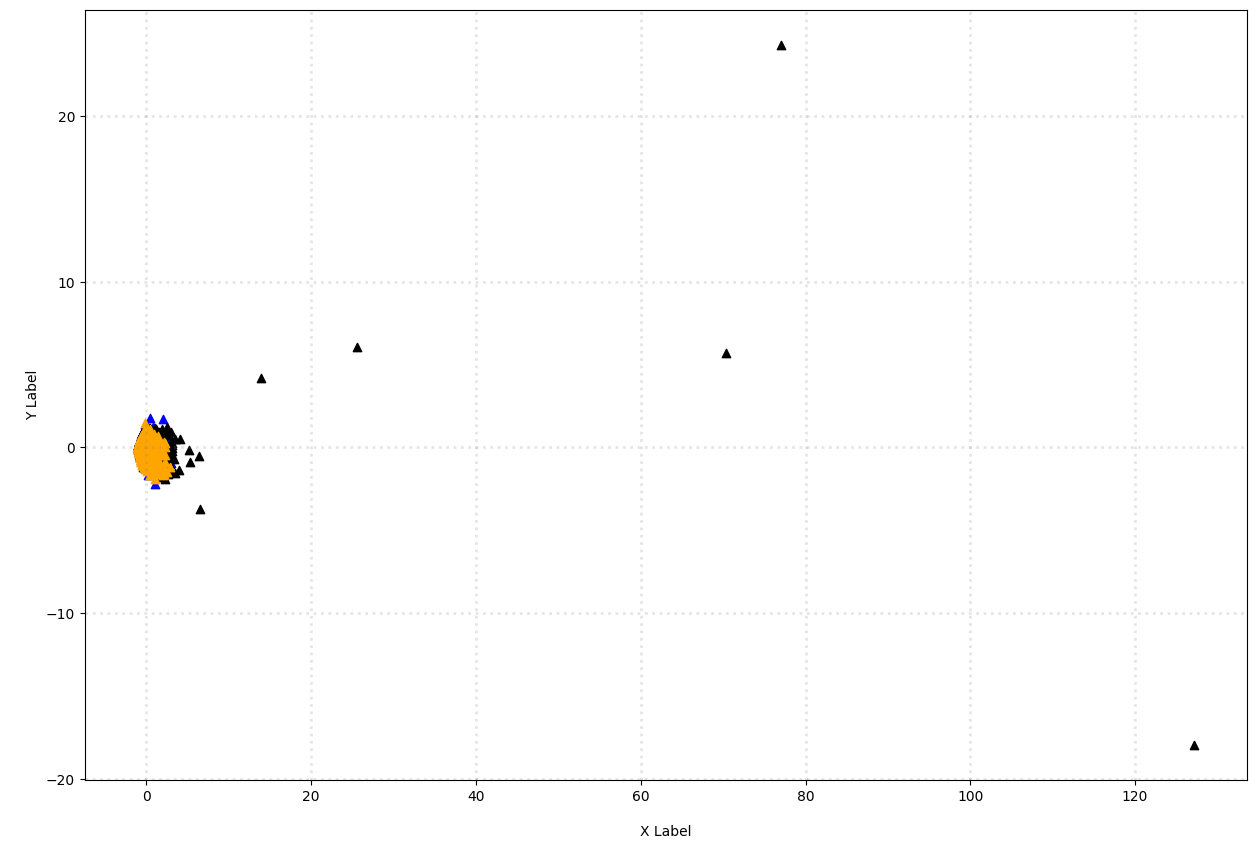

In [54]:
color = ['blue', 'black', 'orange']
fig = plt.figure(figsize = (15,10))
ax = fig.subplots()


for c, category in zip(color, categories):
    xs = comment_reduced[online_comment["websites"] == category].T[0]
    ys = comment_reduced[online_comment["websites"] == category].T[1]
    
   
    ax.scatter(xs, ys, c = c, marker='^')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

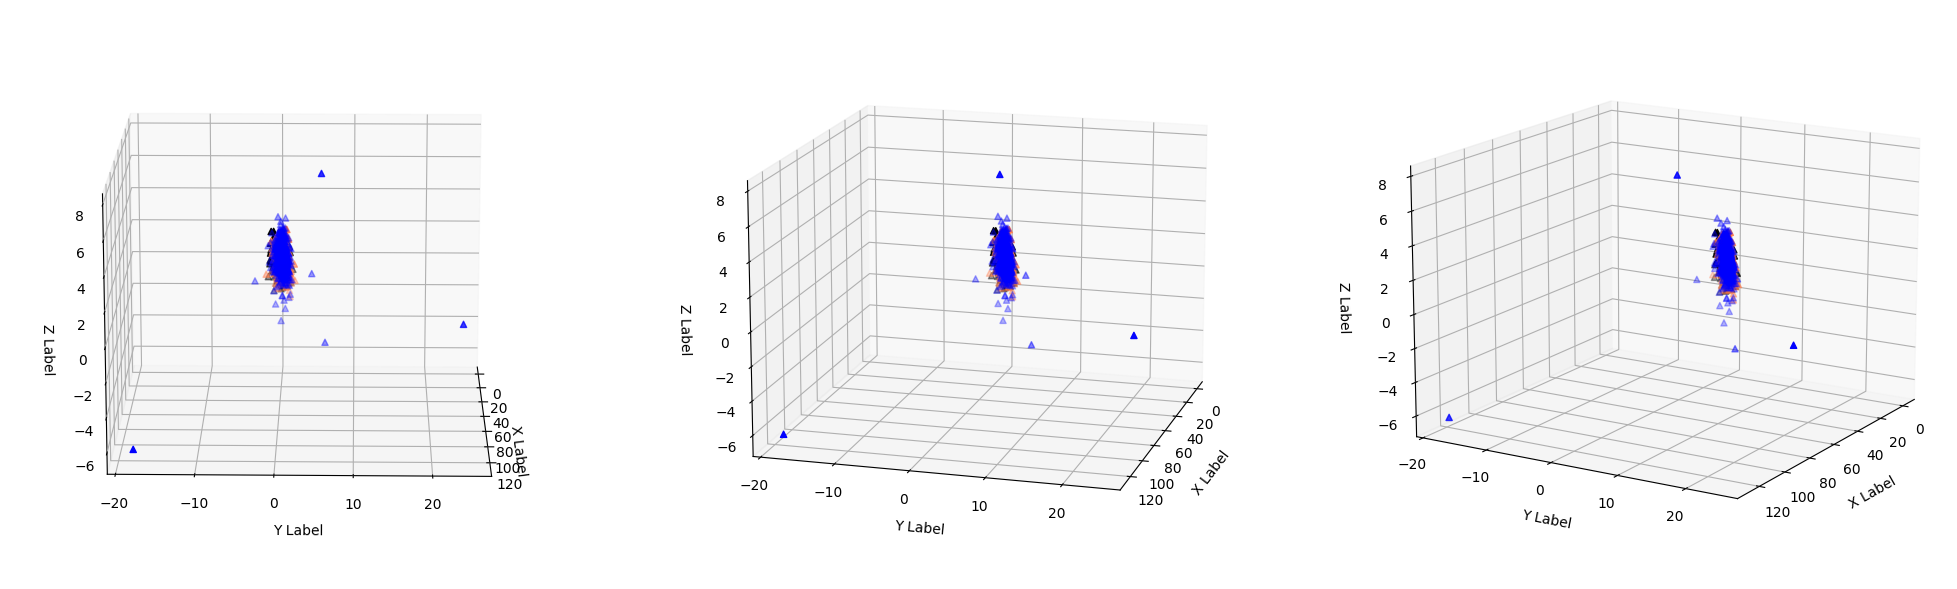

In [55]:
# 3D
from matplotlib import projections

comment_reduced = PCA(n_components=3).fit_transform(comment_counts.toarray()) 
color = ['blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = []

for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        xs = comment_reduced[online_comment["websites"] == category].T[0]
        ys = comment_reduced[online_comment["websites"] == category].T[1]
        zs = comment_reduced[online_comment["websites"] == category].T[2]
   
        ax[i].scatter(xs, ys, zs, c = c, marker='^')

    ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax[i].set_xlabel('\nX Label')
    ax[i].set_ylabel('\nY Label')
    ax[i].set_zlabel('\nZ Label')
    ax[i].view_init(elev=15, azim=(15*i+1))

plt.show()

#### 5.5 Attribute Transformation / Aggregation

In [56]:
term_frequencies = np.asarray(comment_counts.sum(axis=0))[0]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


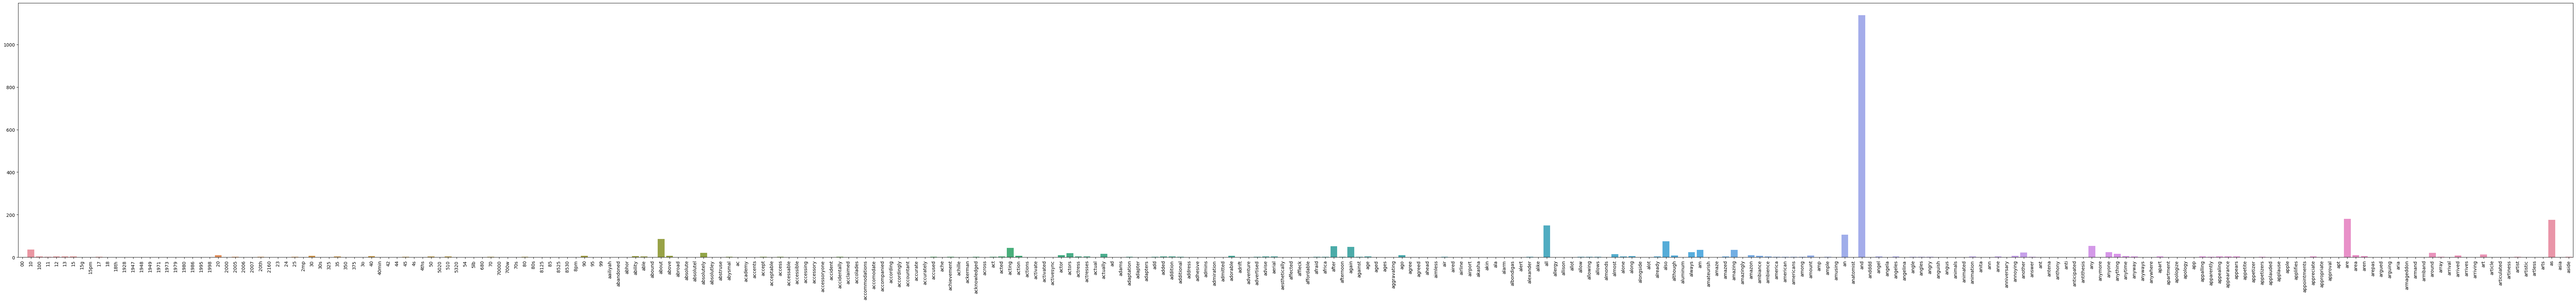

In [57]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


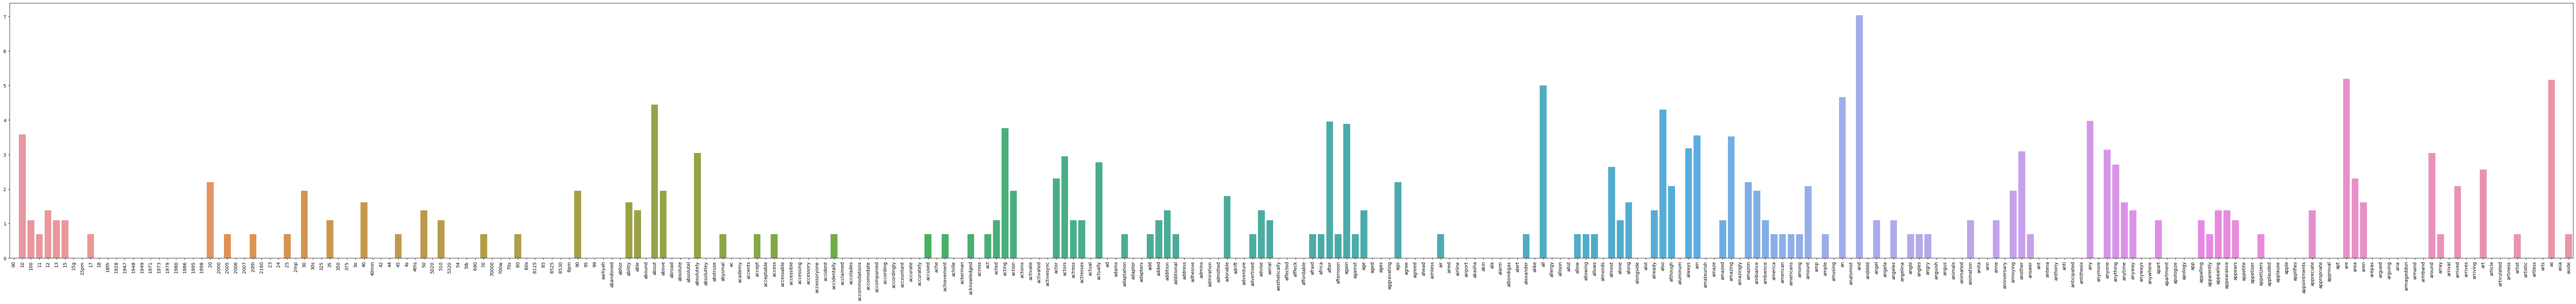

In [58]:
import math
# log distribution
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [60]:
import plotly.express as px

count_vect = CountVectorizer()
comment_counts = count_vect.fit_transform(online_comment.sentence)
# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:, j].toarray()))
term_frequencies = np.asarray(comment_counts.sum(axis = 0))[0]
sort_index = np.argsort(-term_frequencies)
sorted_freq = term_frequencies[sort_index]
fig = px.bar(sorted_freq[0:300], x=count_vect.get_feature_names_out()[sort_index[0:300]] ,  
             y=sorted_freq[0:300])
fig.show()

#### 5.6 Discretization and Binarization

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(online_comment.websites)
online_comment["bin_websites"] = mlb.transform(online_comment["websites"]).tolist()

In [62]:
online_comment[1000:2000]

,sentence,score,websites,unigrams,bin_websites
1010,And those baby owls were adorable.,1,imdb,"[And, those, baby, owls, were, adorable, .]","[0, 1, 0]"
1011,The movie showed a lot of Florida at it's best...,1,imdb,"[The, movie, showed, a, lot, of, Florida, at, ...","[0, 1, 0]"
1012,The Songs Were The Best And The Muppets Were S...,1,imdb,"[The, Songs, Were, The, Best, And, The, Muppet...","[0, 1, 0]"
1013,It Was So Cool.,1,imdb,"[It, Was, So, Cool, .]","[0, 1, 0]"
1014,"This is a very ""right on case"" movie that deli...",1,imdb,"[This, is, a, very, ``, right, on, case, '', m...","[0, 1, 0]"
...,...,...,...,...,...
2008,I hope this place sticks around.,1,yelp,"[I, hope, this, place, sticks, around, .]","[0, 0, 1]"
2009,"I have been in more than a few bars in Vegas, ...",0,yelp,"[I, have, been, in, more, than, a, few, bars, ...","[0, 0, 1]"
2010,The restaurant atmosphere was exquisite.,1,yelp,"[The, restaurant, atmosphere, was, exquisite, .]","[0, 0, 1]"
2011,"Good service, very clean, and inexpensive, to ...",1,yelp,"[Good, service, ,, very, clean, ,, and, inexpe...","[0, 0, 1]"


### 6. Data Exploration

In [63]:
document_to_transform_1 = []
random_record_1 = online_comment.iloc[100]
random_record_1 = random_record_1["sentence"]
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = online_comment.iloc[200]
random_record_2 = random_record_2["sentence"]
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = online_comment.iloc[300]
random_record_3 = random_record_3["sentence"]
document_to_transform_3.append(random_record_3)

In [64]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Integrated seamlessly with the Motorola RAZR phone.']
['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Now I know that I made a wise decision.']


In [65]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.178174
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Part 3: Following tasks on the new dataset.

#### 3.1 New data visualizations

##### Donut Plot


In [67]:
web_count = online_comment.websites.value_counts()
print(web_count)


yelp      996
amazon    990
imdb      745
Name: websites, dtype: int64


In [68]:
type(web_count)

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x1c3ab8f0460>,
 [Text(0.31752386996321086, 0.7014831373622504, 'yelp'),
  Text(-0.738125377736281, -0.21925083065218376, 'amazon'),
  Text(0.5041210220935768, -0.5820326409088475, 'imdb')])

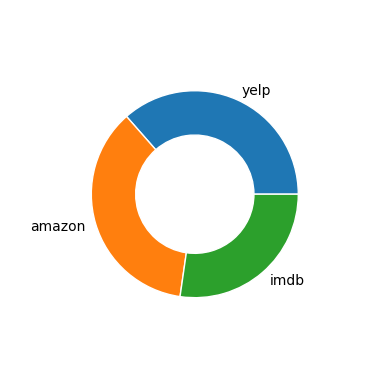

In [69]:
fig, ax = plt.subplots()
size = 0.3
ax.pie(web_count, labels=web_count.index,
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))

#### 3.2 Generate TF-IDF features

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

T_vectorizer = TfidfVectorizer()
comment_TFIDF = T_vectorizer.fit_transform(online_comment.sentence)


In [71]:
TFIDF_df = pd.DataFrame(comment_TFIDF.toarray(), columns=T_vectorizer.get_feature_names_out())
print(TFIDF_df.shape)
TFIDF_df.head(10)

(2731, 5155)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.3 Implement a simple Naive Bayes classifier 

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer



cvt = CountVectorizer()
comment_vec = cvt.fit_transform(online_comment.sentence)
score_label = online_comment.score


comment_vec_train, comment_vec_test, score_label_train, score_label_test = train_test_split(comment_vec, score_label, 
                                                                                            test_size=0.3, random_state=0)

model = BernoulliNB()
model.fit(comment_vec_train, score_label_train)
predict = model.predict(comment_vec_test)

print("accuracy :", model.score(comment_vec_test,score_label_test))


accuracy : 0.8109756097560976


By TF-IDF

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(online_comment.sentence, online_comment.score, test_size=0.3, random_state=0)

TF_vec = TfidfVectorizer()
x_train = TF_vec.fit_transform(x_train)
x_test = TF_vec.transform(x_test)

model = MultinomialNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

print("By TF-IDF\ntest accuracy：",model.score(x_test,y_test))

By TF-IDF
test accuracy： 0.824390243902439


The test result of utilizing TF-IDF features is a little bit better than frequency features. But the nonsignificant difference maybe comes from the lack of difficulty of the data to the classifier.

### Part 4: Discussion

For the heatmap(from Seaborn) result shows the inefficiency of space(spatial and refer to memory), which is caused by the sparsity of the vectors.
It has too many 0 need to be represented. I think it can be improved by other data preprocessing methods or sorting. 

不好意思助教我發現使用plotly在github上會無法自動畫圖，因此有些結果沒有跑出來，需要實際run過code才可以